6
30
constitutive cores: mean 5.8, std 4.85,median 3.0
induced cores: mean 1.45, std 0.97,median 1.0


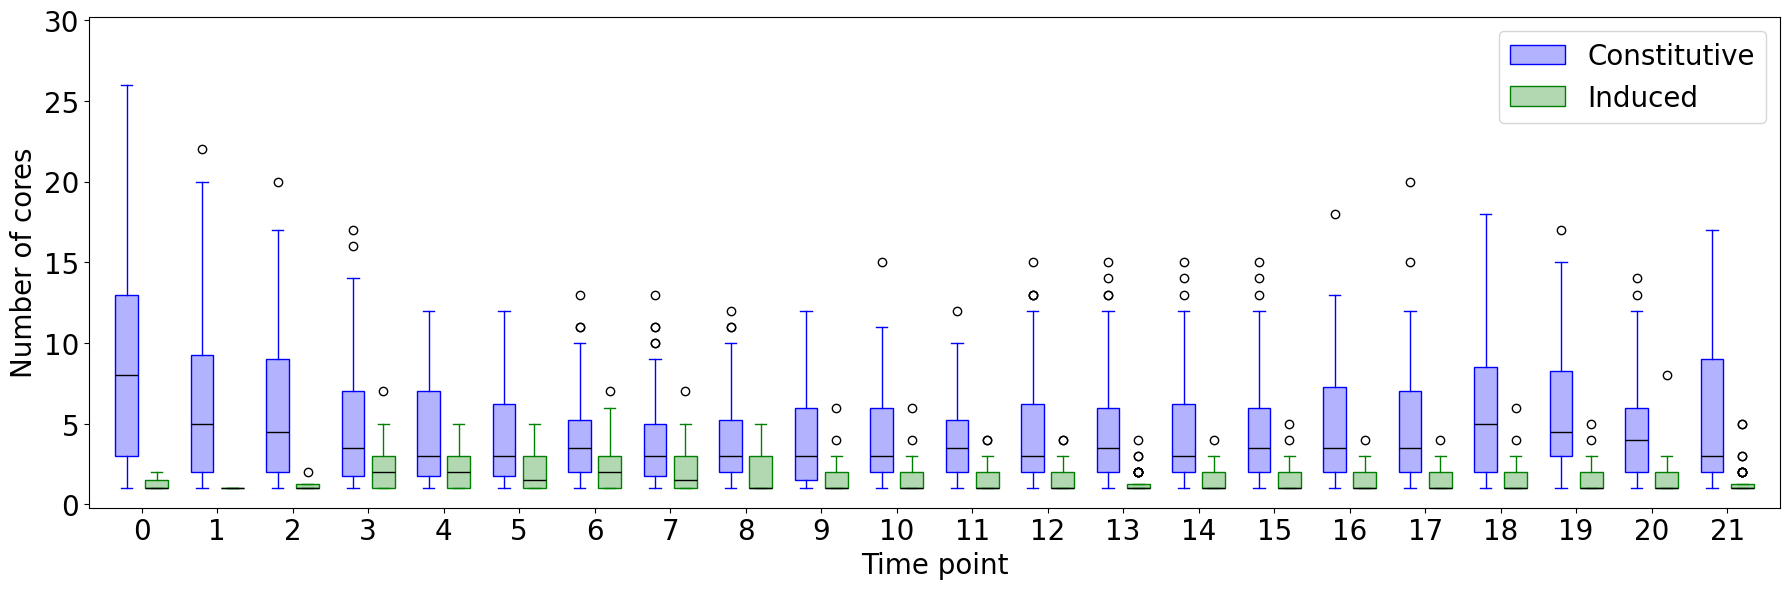

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
def load_dataframe(filename='../data/data_clustered'):
    with open(f'{filename}.pkl', 'rb') as f:
        loaded = pickle.load(f)
    return loaded['df']


def plot_cores_by_timepoint(df, font_size=20):
    # Select relevant slices with relative cluster volume >= 0.1
    filtered_df = df[
        (df['cluster_volume'] >= median_B_cell_volume)
    ]

    # Calculate number of unique clusters (cores) per unique combination of (t, n_cells, ratio, experiment, rep)
    core_counts = filtered_df.groupby(['t', 'n_cells', 'ratio', 'experiment', 'rep'])['cluster'].nunique().reset_index()

    # Define the time points for plotting
    time_points = sorted(df['t'].unique())

    # Split data based on time point and experiment for plotting
    cores_constitutive = [core_counts[(core_counts['t'] == t) & (core_counts['experiment'] == 'constitutive')]['cluster'] for t in time_points]
    cores_induced = [core_counts[(core_counts['t'] == t) & (core_counts['experiment'] == 'induced')]['cluster'] for t in time_points]

    print(sum(cores_constitutive[-1]<=1))
    print(sum(cores_induced[-1]<=1))
    # Set up plot
    x = cores_constitutive[-1]
    print(f'constitutive cores: mean {np.mean(x)}, std {np.std(x):0.2f},median {np.median(x)}')
    x = cores_induced[-1]
    print(f'induced cores: mean {np.mean(x)}, std {np.std(x):0.2f},median {np.median(x)}')


    plt.figure(figsize=(18, 6))
    bar_width = 0.4
    x_ticks = np.arange(len(time_points))

    # Plotting the boxplots for each time point
    for i, t in enumerate(time_points):
        plt.boxplot(cores_constitutive[i],
                    positions=[x_ticks[i] - bar_width / 2],
                    patch_artist=True,
                    widths=0.3,
                    boxprops = dict(facecolor='#b2b2ff', color='blue'),
                    medianprops=dict(color='black'),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'))

        plt.boxplot(cores_induced[i],
                    positions=[x_ticks[i] + bar_width / 2],
                    patch_artist=True,
                    widths=0.3,
                    boxprops=dict(facecolor="#b2d8b2", color='green'),
                    medianprops=dict(color='black'),
                    whiskerprops=dict(color='green'),
                    capprops=dict(color='green'))

    # Plot configuration
    plt.xticks(x_ticks, time_points, fontsize=font_size)
    plt.xlabel('Time point', fontsize=font_size)
    plt.ylabel('Number of cores', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(-0.2, 30.2)
    plt.legend(['Constitutive', 'Induced'], fontsize=font_size)
    plt.tight_layout()
    plt.show()

# Load dataframe
df = load_dataframe()
median_B_cell_volume = np.median(df[(df.t==0) & (df.cell_type=='B')].v)
cluster_v_thresh = 3 * median_B_cell_volume

# Plot cores for different time points
plot_cores_by_timepoint(df)
